<a href="https://colab.research.google.com/github/anaaparamesh/Week1_Public/blob/master/Notebooks/05_Nearest_Neighbors/NearestNeighbors_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Nearest Neighbors Problem Set

In [1]:
# -- imports --
import numpy as np
import pandas as po
import matplotlib.pyplot as plt

# -- kNN --
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

## Problem 1

Consider the following simple data-set:

<img src="https://github.com/BeaverWorksMedlytics2020/Data_Public/raw/master/Images/Week1/knn_notebook_example_table.png" alt="Example Table" width="600">

Now consider the Sample:
    $$X= 4, Y = 4, Z = 2$$

Using kNN, what is the class for this sample for $k = 1$ and $k = 3?$ Use the Eucledian metric.

(YOUR ANSWER HERE) k = 1, 1
k = 3, 2


## Problem 2
Earlier in the tutorial we were told that kNN depends on several factors, one of them being $k$. Consider the following datasets below, find the optimal value of $k$ that gives the highest accuracy. Visualize your data! Can you come up with some rule for getting a good idea of what $k$ is? 

HINT: look for a pattern/bound! Answer should be in terms of the size of the dataset $n$. 

In [ ]:
# Sovle this problem for each of these datasets
from sklearn.datasets import load_iris 
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_wine 

# Load those datasets into some easily accessible variables
#The datasets are already normalized, so that saves us some steps!
iris = load_iris()                    #iris dataset: size = 150
breast_cancer = load_breast_cancer()  #diabetes dataset: size = 569
wine = load_wine()                    #wine dataset: size 178

# This function will perfom KNN classification for a specified k
def split_train_test_dataset(dataset, k, test_size=0.2):
    """Loads and performs KNN classification on the provided dataset"""
    # Grab and split the dataset
    X_train, X_val, y_train, y_val = train_test_split(
        dataset.data, dataset.target, test_size=test_size, random_state=0)

    # Build a KNN classifier, fit it and test its predictions
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    print("Validation Accuracy is {:5.1%}".format(
        accuracy_score(y_val, knn.predict(X_val))))


Validation Accuracy is 100.0%
Validation Accuracy is 96.5%
Validation Accuracy is 80.6%
[ 5.          5.04401408  5.08802817  5.13204225  5.17605634  5.22007042
  5.26408451  5.30809859  5.35211268  5.39612676  5.44014085  5.48415493
  5.52816901  5.5721831   5.61619718  5.66021127  5.70422535  5.74823944
  5.79225352  5.83626761  5.88028169  5.92429577  5.96830986  6.01232394
  6.05633803  6.10035211  6.1443662   6.18838028  6.23239437  6.27640845
  6.32042254  6.36443662  6.4084507   6.45246479  6.49647887  6.54049296
  6.58450704  6.62852113  6.67253521  6.7165493   6.76056338  6.80457746
  6.84859155  6.89260563  6.93661972  6.9806338   7.02464789  7.06866197
  7.11267606  7.15669014  7.20070423  7.24471831  7.28873239  7.33274648
  7.37676056  7.42077465  7.46478873  7.50880282  7.5528169   7.59683099
  7.64084507  7.68485915  7.72887324  7.77288732  7.81690141  7.86091549
  7.90492958  7.94894366  7.99295775  8.03697183  8.08098592  8.125
  8.16901408  8.21302817  8.25704225  8.3

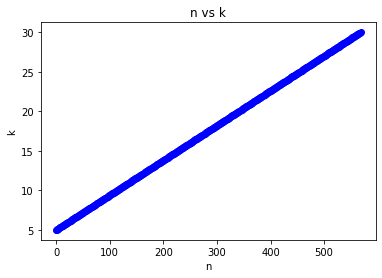

In [ ]:
# your code here
split_train_test_dataset(iris, 6, test_size=0.2)
split_train_test_dataset(breast_cancer, 11, test_size=0.2)
split_train_test_dataset(wine, 5, test_size=0.2)

fig, ax = plt.subplots()
# Pass multiple numpy arrays as arguments to plt.plot
k = np.linspace(5, 30, num=569)
print(k)

n = np.arange(0, 569)
ax.plot(n, k, 'bo') 
plt.title("n vs k")
plt.xlabel("n")
plt.ylabel('k')
plt.show()



Write a single mathematical expression describing the relationship you found between $n$ (the size of the dataset) and $k$ (the number of datapoints used to classify each validation datum).

(YOUR ANSWER HERE) 0.04n

## Problem 3
Now, we will **be writing our k-NNA**. Recall that we said a kNN is comprised of a predictions and using those predictions to classify the data. Here we will try to mimic sklearn's kNN methods. We will be using the Pima diabetes dataset. 

### Loading and splitting data

In [ ]:
# -- loading dataset -- #
url = "https://github.com/BeaverWorksMedlytics2020/Data_Public/raw/master/NotebookExampleData/Week1/diabetes.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = po.read_csv(url, names=names)

# -- dropping NaN rows -- #
invalid = ['plas', 'pres', 'skin', 'test', 'mass']

for i in invalid:
    data[i].replace(to_replace=0, value=np.nan, inplace=True)
    
data = data.dropna(axis=0).reset_index(drop=True)

Now, let's clearly define which columns will act as explanatory variables, and which column will be the target value, and split the dataset between your training data and testing data. Let's try an 80-20 split and use sklearn's [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) method (set random_state = 0 so we get the same output each time).

In [ ]:
from sklearn.model_selection import train_test_split

# columns we will use to make predictions with (features!) feel free to play around with these
X_cols = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age']
# column that we want to predict
y_col = 'class'


# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data[X_cols], data[y_col], test_size=0.2, random_state=0)

# further split X and y of training into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

print('There are {} training samples with {} features and {} associated classification labels'.format(*X_train.shape, *y_train.shape))
print('There are {} validation samples with {} features and {} associated classification labels'.format(*X_val.shape, *y_val.shape))
print('There are {} test samples with {} features and {} associated classification labels'.format(*X_test.shape, *y_test.shape))

There are 250 training samples with 8 features and 250 associated classification labels
There are 63 validation samples with 8 features and 63 associated classification labels
There are 79 test samples with 8 features and 79 associated classification labels


### Normalizing Data

Let's not forget to normalize the data! We'll use sklearn's StandardScaler normalization like we did before to normalize the training **and** validation/data.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

for i in list(X_train):
    feature_data_train = X_train[i].values.reshape(-1, 1)
    scaler.fit(feature_data_train)
    X_train[i] = scaler.transform(feature_data_train)

for j in list(X_test):
    feature_data_test = X_test[j].values.reshape(-1, 1)
    scaler.fit(feature_data_test)
    X_test[j] = scaler.transform(feature_data_test)
    
for k in list(X_val):
    feature_data_val = X_val[k].values.reshape(-1, 1)
    scaler.fit(feature_data_val)
    X_val[k] = scaler.transform(feature_data_val)

### Writing our kNN

Now for the fun part! Fill in the 3 following methods, euclidean_dist(), predict(), and knn().

The predict method that we'll make below needs to: 
1. Compute the euclidean distance between the “new” observation and all the data points in the training set. 
2. Assign the corresponding label to the observation
3. Select the k nearest ones and perform a "majority vote"

In [ ]:
# Euclidean distance function from tutorial
def euclidean_dist(datum1, datum2):
    inner_val = 0.0
    
    for g in range(datum1.shape[0]):
        inner_val += (datum1[g]- datum2[g]) ** 2
    
    distance = np.sqrt(inner_val)
    return(distance)

In [ ]:
from collections import Counter

def predict(x_training, y_training, x_test_sample, k):
    # create list for distances and targets
    distances = []
    targets = []

    ## YOUR CODE HERE
    i = 0
    while i < len(y_training):
      targets.append(y_training[i])
      i += 1
    i = 0
    while i < len(x_training):
      j = 0
      while j < len(x_test_sample):
        distances.append(euclidean_dist(x_training[i], x_test_sample[j]))
        targets.append(y_training[i])
        j += 1
      i += 1
    return(distances, targets)
    
    
    


In [ ]:
def knn(x_training, y_training, x_testing, k):
    
    ## YOUR CODE HERE
    predict_result = predict(x_training, y_training, x_testing, k)
    distances =  predict_result[0]
    targets = predict_result[1]
    indexes = sorted(range(len(distances)), key = lambda sub: test_list[sub])[:k]
    y_training_neighbors = []
    for value in indexes:
      y_training_neighbors.append(targets[value])
    prediction = max(set(y_training_neighbors), key=output_values.count)
    return prediction



      

When done, test your code by running the methods here!

In [ ]:
from sklearn.metrics import accuracy_score
import time

start = time.time()
predictions_slow = knn(X_train, y_train, X_val, k=5)

print('Took {} seconds'.format(time.time() - start))
print("Validation Accuracy is ", accuracy_score(y_val,predictions_slow)*100)

KeyError: ignored

Check sklearn's predictions on validation data from the tutorial notebook and make sure they match yours. Sklearn is faster, but you should get the same answers.